Defence: Krizek Michael

In [16]:
import pandas as pd
import numpy as np
from scipy import stats #for Kaunasweather
from sklearn.linear_model import LinearRegression #for predictions and calculations
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error  # matrics
from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_excel('Electricity_S54.xlsx',parse_dates=['Date and time'])
df
#df = pd.read_csv('ThermalHotWater_3_.csv',sep='\t', usecols=['MeteringID', 'ReadDateTime', 'Power_kWh'],
    #index_col='ReadDateTime')

,Client name,Object ID,Object No.,Date and time,Meter No.,Energija,"Consumption, kWh"
0,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,2015-01-01 00:00:00,"43712,556753,556755,556757",P+,7.432
1,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,2015-01-01 01:00:00,"43712,556753,556755,556757",P+,7.28
2,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,2015-01-01 02:00:00,"43712,556753,556755,556757",P+,7.24
3,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,2015-01-01 03:00:00,"43712,556753,556755,556757",P+,7.36
4,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,2015-01-01 04:00:00,"43712,556753,556755,556757",P+,7.344
...,...,...,...,...,...,...,...
55483,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,2021-04-30 19:00:00,"02282085,02356782,02827159,02827177",P+,4.4464
55484,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,2021-04-30 20:00:00,"02282085,02356782,02827159,02827177",P+,4.424
55485,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,2021-04-30 21:00:00,"02282085,02356782,02827159,02827177",P+,4.8464
55486,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,2021-04-30 22:00:00,"02282085,02356782,02827159,02827177",P+,4.6096


In [19]:
df = df.set_index('Date and time')
df

,Client name,Object ID,Object No.,Meter No.,Energija,"Consumption, kWh"
Date and time,,,,,,
2015-01-01 00:00:00,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"43712,556753,556755,556757",P+,7.432
2015-01-01 01:00:00,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"43712,556753,556755,556757",P+,7.28
2015-01-01 02:00:00,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"43712,556753,556755,556757",P+,7.24
2015-01-01 03:00:00,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"43712,556753,556755,556757",P+,7.36
2015-01-01 04:00:00,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"43712,556753,556755,556757",P+,7.344
...,...,...,...,...,...,...
2021-04-30 19:00:00,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"02282085,02356782,02827159,02827177",P+,4.4464
2021-04-30 20:00:00,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"02282085,02356782,02827159,02827177",P+,4.424
2021-04-30 21:00:00,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"02282085,02356782,02827159,02827177",P+,4.8464


In [20]:
df.isnull().sum() #NO need to deal with 0
#df.interpolate(method='linear', axis=0, inplace=True)

Client name         0
Object ID           0
Object No.          0
Meter No.           0
Energija            0
Consumption, kWh    0
dtype: int64

float64


<Axes: xlabel='Date and time'>

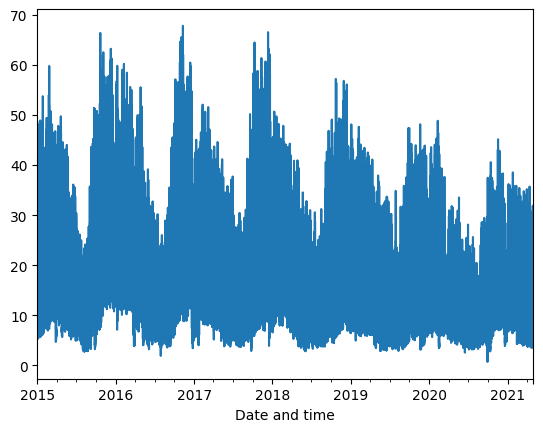

In [39]:
#df.plot() #NO outliners visible
#df[df > X] = np.nan
#df=df[df['Power_kWh']<2000]
#df.plot()
df['Consumption, kWh'] = pd.to_numeric(df['Consumption, kWh'], errors='coerce')
print(df['Consumption, kWh'].dtype)
df['Consumption, kWh'].plot()

In [40]:
dfw=pd.read_excel('KaunasWeather.xlsx',parse_dates=True,index_col=0)
dfw

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres
date,,,,,,,,,
2012-01-01,-1.3,-2.9,0.7,NaN,10.0,NaN,NaN,NaN,NaN
2012-01-02,1.2,-1.5,3.0,7.1,NaN,NaN,NaN,NaN,NaN
2012-01-03,3.3,NaN,5.3,11.9,NaN,NaN,NaN,NaN,NaN
2012-01-04,4.3,0.9,5.1,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-10-27,9.8,6.5,11.1,3.0,NaN,237.0,17.9,38.9,1017.4
2021-10-28,11.7,9.7,12.8,0.8,NaN,247.2,15.4,38.9,1020.2
2021-10-29,10.3,6.4,14.5,0.0,NaN,177.8,14.4,33.3,1022.1


In [49]:
dfw['tmin']=dfw['tmin'].interpolate(method='linear')
dfw['tmax']=dfw['tmax'].interpolate(method='linear')
dfw['prcp'] = dfw['prcp'].fillna(0)
dfw['snow'] = dfw['snow'].fillna(0)
dfw['wdir'] = dfw['wdir'].fillna(0)
dfw['wspd'] = dfw['wspd'].fillna(0)
dfw['wpgt'] = dfw['wpgt'].fillna(0)
mean = dfw['pres'].mean()
dfw['pres'] = dfw['pres'].fillna(mean)
dfw

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres
date,,,,,,,,,
2012-01-01,-1.3,-2.9,0.7,0.0,10.0,0.0,0.0,0.0,1015.250502
2012-01-02,1.2,-1.5,3.0,7.1,0.0,0.0,0.0,0.0,1015.250502
2012-01-03,3.3,-0.3,5.3,11.9,0.0,0.0,0.0,0.0,1015.250502
2012-01-04,4.3,0.9,5.1,0.0,0.0,0.0,0.0,0.0,1015.250502
2012-01-05,2.4,0.1,4.4,0.0,0.0,0.0,0.0,0.0,1015.250502
...,...,...,...,...,...,...,...,...,...
2021-10-27,9.8,6.5,11.1,3.0,0.0,237.0,17.9,38.9,1017.400000
2021-10-28,11.7,9.7,12.8,0.8,0.0,247.2,15.4,38.9,1020.200000
2021-10-29,10.3,6.4,14.5,0.0,0.0,177.8,14.4,33.3,1022.100000


In [51]:
type(dfw.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [53]:
dfr=dfw.resample('D').sum()
dfr

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres
date,,,,,,,,,
2012-01-01,-1.3,-2.9,0.7,0.0,10.0,0.0,0.0,0.0,1015.250502
2012-01-02,1.2,-1.5,3.0,7.1,0.0,0.0,0.0,0.0,1015.250502
2012-01-03,3.3,-0.3,5.3,11.9,0.0,0.0,0.0,0.0,1015.250502
2012-01-04,4.3,0.9,5.1,0.0,0.0,0.0,0.0,0.0,1015.250502
2012-01-05,2.4,0.1,4.4,0.0,0.0,0.0,0.0,0.0,1015.250502
...,...,...,...,...,...,...,...,...,...
2021-10-27,9.8,6.5,11.1,3.0,0.0,237.0,17.9,38.9,1017.400000
2021-10-28,11.7,9.7,12.8,0.8,0.0,247.2,15.4,38.9,1020.200000
2021-10-29,10.3,6.4,14.5,0.0,0.0,177.8,14.4,33.3,1022.100000


In [55]:
dfs = df.join(dfr, how='inner')
dfs

,Client name,Object ID,Object No.,Meter No.,Energija,"Consumption, kWh",tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres
2015-01-01,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"43712,556753,556755,556757",P+,7.4320,2.3,0.200000,3.2,0.5,30.0,0.0,0.0,0.0,1015.250502
2015-01-02,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"43712,556753,556755,556757",P+,6.6240,3.1,1.100000,5.3,5.1,0.0,0.0,0.0,0.0,1015.250502
2015-01-03,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"43712,556753,556755,556757",P+,6.4960,2.8,0.750000,3.6,5.1,0.0,0.0,0.0,0.0,1015.250502
2015-01-04,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"43712,556753,556755,556757",P+,7.3760,0.9,0.400000,2.1,4.1,0.0,0.0,0.0,0.0,1015.250502
2015-01-05,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"43712,556753,556755,556757",P+,6.3920,-2.0,-4.733333,0.7,1.0,10.0,0.0,0.0,0.0,1015.250502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"02282085,02356782,02827159,02827177",P+,4.2816,1.7,-1.100000,4.4,4.3,0.0,273.2,12.8,31.5,1015.900000
2021-04-27,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"02282085,02356782,02827159,02827177",P+,4.7536,3.4,-1.400000,6.4,1.5,0.0,272.1,12.7,27.8,1014.600000
2021-04-28,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"02282085,02356782,02827159,02827177",P+,4.6192,6.2,2.800000,9.5,0.0,0.0,216.4,7.2,20.4,1016.700000
2021-04-29,KAUNO TECHNOLOGIJOS UNIVERSITETAS,2206882,71215643,"02282085,02356782,02827159,02827177",P+,4.6928,9.9,1.900000,14.4,1.6,0.0,124.9,12.4,33.3,1011.200000


In [57]:
colums_delete = ["Client name", "Object ID", "Object No.", "Meter No.", "Energija"]
dfs = dfs.drop(columns=colums_delete)
dfs

,"Consumption, kWh",tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres
2015-01-01,7.4320,2.3,0.200000,3.2,0.5,30.0,0.0,0.0,0.0,1015.250502
2015-01-02,6.6240,3.1,1.100000,5.3,5.1,0.0,0.0,0.0,0.0,1015.250502
2015-01-03,6.4960,2.8,0.750000,3.6,5.1,0.0,0.0,0.0,0.0,1015.250502
2015-01-04,7.3760,0.9,0.400000,2.1,4.1,0.0,0.0,0.0,0.0,1015.250502
2015-01-05,6.3920,-2.0,-4.733333,0.7,1.0,10.0,0.0,0.0,0.0,1015.250502
...,...,...,...,...,...,...,...,...,...,...
2021-04-26,4.2816,1.7,-1.100000,4.4,4.3,0.0,273.2,12.8,31.5,1015.900000
2021-04-27,4.7536,3.4,-1.400000,6.4,1.5,0.0,272.1,12.7,27.8,1014.600000
2021-04-28,4.6192,6.2,2.800000,9.5,0.0,0.0,216.4,7.2,20.4,1016.700000
2021-04-29,4.6928,9.9,1.900000,14.4,1.6,0.0,124.9,12.4,33.3,1011.200000


In [59]:
print(dfs.describe().T[['mean', 'std', '50%', 'min', '25%', '75%', 'max']]) 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

                         mean         std          50%      min          25%  \
Consumption, kWh     8.593851    2.894961     8.108000    2.784     6.304000   
tavg                 8.092604    8.355733     7.300000  -20.300     1.800000   
tmin                 4.004022    7.362276     3.400000  -24.100    -0.600000   
tmax                11.950779    9.751103    11.100000  -17.100     3.991667   
prcp                 1.473400    3.692414     0.000000    0.000     0.000000   
snow                 8.406142   30.999348     0.000000    0.000     0.000000   
wdir                84.687760  114.688333     0.000000    0.000     0.000000   
wspd                 5.707872    7.481644     0.000000    0.000     0.000000   
wpgt                14.307223   17.362488     0.000000    0.000     0.000000   
pres              1015.244702    5.950728  1015.250502  979.000  1015.250502   

                          75%       max  
Consumption, kWh    10.416000    20.296  
tavg                15.000000    26

In [72]:
dfs.isna().sum()

Consumption, kWh    0
tavg                0
tmin                0
tmax                0
prcp                0
snow                0
wdir                0
wspd                0
wpgt                0
pres                0
weekday             0
month               0
hour                0
weekend             0
dtype: int64

In [63]:
# Feature eng.- best for energi consumption prediction
dfs.loc[:, ['weekday']] = dfs.index.weekday  
dfs.loc[:, ['month']] = dfs.index.month      
dfs.loc[:, ['hour']] = dfs.index.hour        
dfs.loc[:, ['weekend']] = (dfs['weekday'] >= 5).astype(int)  
dfs
 


,"Consumption, kWh",tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,weekday,month,hour,weekend
2015-01-01,7.4320,2.3,0.200000,3.2,0.5,30.0,0.0,0.0,0.0,1015.250502,3,1,0,0
2015-01-02,6.6240,3.1,1.100000,5.3,5.1,0.0,0.0,0.0,0.0,1015.250502,4,1,0,0
2015-01-03,6.4960,2.8,0.750000,3.6,5.1,0.0,0.0,0.0,0.0,1015.250502,5,1,0,1
2015-01-04,7.3760,0.9,0.400000,2.1,4.1,0.0,0.0,0.0,0.0,1015.250502,6,1,0,1
2015-01-05,6.3920,-2.0,-4.733333,0.7,1.0,10.0,0.0,0.0,0.0,1015.250502,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,4.2816,1.7,-1.100000,4.4,4.3,0.0,273.2,12.8,31.5,1015.900000,0,4,0,0
2021-04-27,4.7536,3.4,-1.400000,6.4,1.5,0.0,272.1,12.7,27.8,1014.600000,1,4,0,0
2021-04-28,4.6192,6.2,2.800000,9.5,0.0,0.0,216.4,7.2,20.4,1016.700000,2,4,0,0
2021-04-29,4.6928,9.9,1.900000,14.4,1.6,0.0,124.9,12.4,33.3,1011.200000,3,4,0,0


<Axes: >

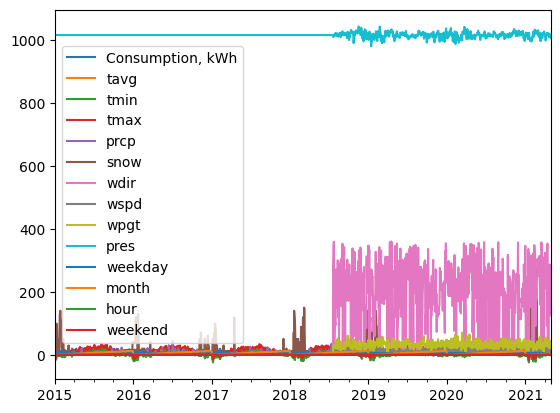

In [65]:
dfs.plot()

In [66]:
dfs = dfs.loc['2021':]
y = dfs['Consumption, kWh']
X = dfs.drop(columns=['Consumption, kWh'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [69]:
reg = LinearRegression().fit(X_train, y_train)
print('train', reg.score(X_train, y_train), 'test', reg.score(X_test, y_test))

train 0.7801343960267533 test 0.8178352362586143


a) 78% of the variance in the training data  
b) 82% in the test data indicating 

It is good performance and generalization. 
